# <span style = "color : red"> <h2 style="text-align: center;"> Caching in Streamlit </h2> </span>
 <h3 style="text-align: center"> Lets Explore </h3>

## Basic

Agenda 
 - Basic use of st.cache_data
 - Basic usages of st.cache_resource

### Streamlit runs the Python code file from top to bottom 

- The file runs when:
  
  * The source code changes
  * There is a user interaction with widget

- This comes with advantage and drawbacks
   
  * Development model is easy and intuitive

  [x] Long running functions must rerun , slowing down the app

  [x] Objects get recreated everytime, hard to presist across reruns and     
  sessions
  
  [x] As example, csv file should be read once, should persist after user interaction and across session

### How to cache in Streamlit

```
@st.cache_data

def some_functions(param1,param2):
       return something

@st.cache_resources

def load_some_model(param):
       return model
```

### How caching works

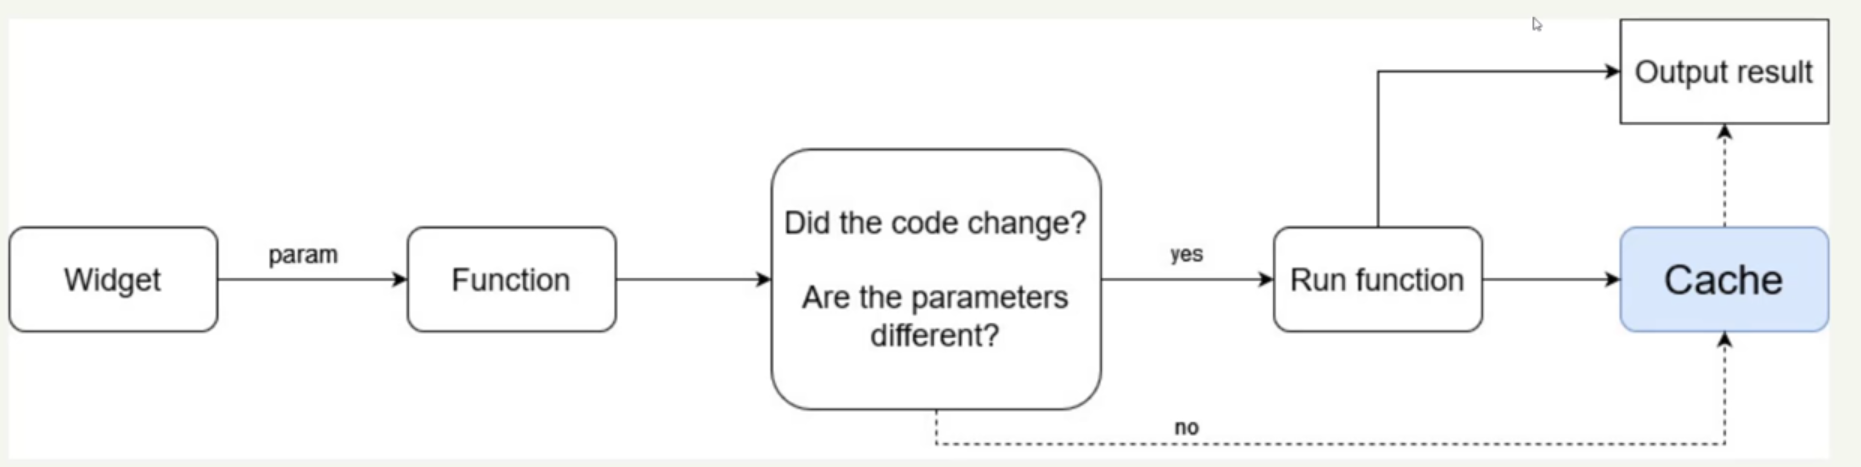

### st.cache_data

Cache computation that returns data:

  - DataFrame from CSV
  - Make a calculation
  - Query an API
  - Anything that returns serializable obj(str,int,float,DataFrame,array,list, etc)

### st.cache_resource 

Cache resources that should be available globally across users, session and rerun

Usally limit to:

  - ML models
  - Database connections

## Advance 

Agenda
 
 - Behaviour of caching 
 - concurrency and mutation 
 - Other advacne functions

### Behaviour of st.cache_data


   - Makes a copy of the result from the cache and sends it to the cliet
   - Copying the results prevents mutation and concurrency issues


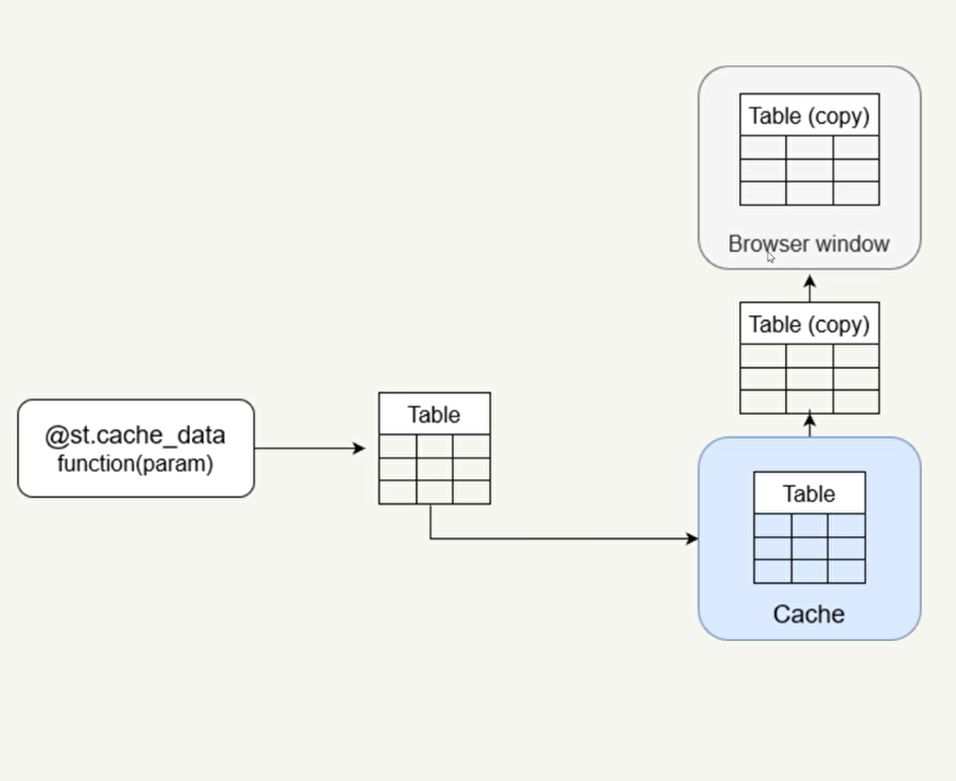

### Beheviour

   - No copy is made: the reult itself is store in the cache and made available to all users and sessions
   - Save memory
   - Make sure the objects is not muated !


![alt text](<image\Screenshot 2024-05-11 140546.png>)

### Mutation and concurrency 

 **Mutation**:  a change to the return value of a function after it was called

 **Concurrency**:  multiple sessions causing changes, Ex: two users using the app at the same time is a concurrency

```
@st.cache_resources

def create_list():
    l=[1,2,3]
    return l

l=create_list()
# Mutate the list  
l=l.remove(1)
st.write(l) # will display [2,3]
```

**Avobe code is the example of the danger of mutation(that's why we use cache_resource)**
   - Run 1: App will work
   - Run 2: App will crash, because we try to remove an element that doesn't exist 

```
@st.cache_resources

def create_list():
    l=[1,2,3]
    return l

l=create_list()
# Mutate the list
 
l[0]=l[0]+1
st.write(l)
```

**Avobe code is the exaple of the danger of use concurrency(that's why we use cache_resource)**

 - User A: sees[2,2,3]
 - user B: sees[3,2,3]
 - User C: sees[4,2,3]

### Advance function 

 **Cache duration**
  
   - Objects in the cache can become outdated
   - Use the ttl(time to live) parameter to refresh the cache. Sets time to elapse before running the function again

   ```
   # cache the data for 1h (1h = 3600)
   @st.cache_data(ttl=3600)

   ``` 
 **Cache size**
  
  - Caching many large objects cause the cache to run out of memory
  - Use the max_entries parameters to set a maximum number of entries. Will discard old values in the cache

  ```
  @st.cache_data(max_entries=1000)
  ``` 
 **Customize the spinner**
  
  - It is possible to customize the default spinner when running a function for the first time

  ```
  # Disbalt the spinner 
  @st.cache_data(show_spinnner=False)

  # Write a custom message
  @st.cache_data(show_spinner="Customer spinner text)
  
  ```
 **Exclude input parameters**
  
  - A cache function must have hashbale input parameters
  ```
  # Use an underscore before the parameter
  # you want to exclude from the cache
  @st.cache_data
  def make_predictions(_model,X_pred):
    preds=model.predict(X_pred)
    return preds
  ```